In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import folium

In [2]:
import cufflinks as cf
cf.go_offline()

In [3]:
import plotly.graph_objs as go

In [182]:
from plotly import __version__
from plotly.offline import init_notebook_mode, plot

In [183]:
init_notebook_mode(connected=True)

In [249]:
df = pd.read_csv('covid_19_data.csv')
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [250]:
df.drop('SNo',axis=1,inplace=True)

In [251]:
df.head()

ObservationDate Province/State  Country/Region      Last Update  Confirmed  \
0      01/22/2020          Anhui  Mainland China  1/22/2020 17:00        1.0   
1      01/22/2020        Beijing  Mainland China  1/22/2020 17:00       14.0   
2      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00        6.0   
3      01/22/2020         Fujian  Mainland China  1/22/2020 17:00        1.0   
4      01/22/2020          Gansu  Mainland China  1/22/2020 17:00        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12249 entries, 0 to 12248
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  12249 non-null  object 
 1   Province/State   6407 non-null   object 
 2   Country/Region   12249 non-null  object 
 3   Last Update      12249 non-null  object 
 4   Confirmed        12249 non-null  float64
 5   Deaths           12249 non-null  float64
 6   Recovered        12249 non-null  float64
dtypes: float64(3), object(4)
memory usage: 670.0+ KB


In [253]:
df.describe()

Confirmed        Deaths     Recovered
count   12249.000000  12249.000000  12249.000000
mean     1315.721283     59.312515    344.905298
std      7771.564633    559.659824   3257.034698
min         0.000000      0.000000      0.000000
25%         4.000000      0.000000      0.000000
50%        44.000000      0.000000      1.000000
75%       301.000000      3.000000     18.000000
max    131646.000000  15887.000000  63945.000000

In [254]:
df.dropna()

ObservationDate Province/State  Country/Region          Last Update  \
0          01/22/2020          Anhui  Mainland China      1/22/2020 17:00   
1          01/22/2020        Beijing  Mainland China      1/22/2020 17:00   
2          01/22/2020      Chongqing  Mainland China      1/22/2020 17:00   
3          01/22/2020         Fujian  Mainland China      1/22/2020 17:00   
4          01/22/2020          Gansu  Mainland China      1/22/2020 17:00   
...               ...            ...             ...                  ...   
12244      04/05/2020        Wyoming              US  2020-04-05 23:13:44   
12245      04/05/2020       Xinjiang  Mainland China  2020-04-05 23:13:44   
12246      04/05/2020          Yukon          Canada  2020-04-05 23:13:44   
12247      04/05/2020         Yunnan  Mainland China  2020-04-05 23:13:44   
12248      04/05/2020       Zhejiang  Mainland China  2020-04-05 23:13:44   

       Confirmed  Deaths  Recovered  
0            1.0     0.0        0.0  
1           14.0     0.0        0.0  
2            6.0     0.0        0.0  
3            1.0     0.0        0.0  
4            0.0     0.0        0.0  
...          ...     ...        ...  
12244      197.0     0.0        0.0  
12245       76.0     3.0       73.0  
12246        6.0     0.0        0.0  
12247      184.0     2.0      172.0  
12248     1263.0     1.0     1230.0  

[6407 rows x 7 columns]

In [279]:
df.rename(columns={'Country/Region':'Country','Province/State':'State'},inplace=True)

In [280]:
df.groupby('ObservationDate').sum()

Confirmed   Deaths  Recovered
ObservationDate                               
01/22/2020           555.0     17.0       28.0
01/23/2020           653.0     18.0       30.0
01/24/2020           941.0     26.0       36.0
01/25/2020          1438.0     42.0       39.0
01/26/2020          2118.0     56.0       52.0
...                    ...      ...        ...
04/01/2020        932605.0  46809.0   193177.0
04/02/2020       1013157.0  52983.0   210263.0
04/03/2020       1095917.0  58787.0   225796.0
04/04/2020       1197405.0  64606.0   246152.0
04/05/2020       1272115.0  69374.0   260012.0

[75 rows x 3 columns]

In [33]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()
recovered

ObservationDate  Recovered
0       01/22/2020       28.0
1       01/23/2020       30.0
2       01/24/2020       36.0
3       01/25/2020       39.0
4       01/26/2020       52.0
..             ...        ...
70      04/01/2020   193177.0
71      04/02/2020   210263.0
72      04/03/2020   225796.0
73      04/04/2020   246152.0
74      04/05/2020   260012.0

[75 rows x 2 columns]

In [34]:
df['ObservationDate'].value_counts()

04/05/2020    319
04/04/2020    316
04/03/2020    315
04/02/2020    315
04/01/2020    313
             ... 
01/26/2020     47
01/23/2020     46
01/25/2020     44
01/24/2020     41
01/22/2020     38
Name: ObservationDate, Length: 75, dtype: int64

In [35]:
df.rename(columns={'Country/Region':'Country','Province/State':'State'},inplace=True)

In [36]:
df_ind = df.query('Country=="India"')

In [37]:
df_ind

ObservationDate State Country          Last Update  Confirmed  Deaths  \
430        01/30/2020   NaN   India        1/30/20 16:00        1.0     0.0   
491        01/31/2020   NaN   India      1/31/2020 23:59        1.0     0.0   
547        02/01/2020   NaN   India       1/31/2020 8:15        1.0     0.0   
607        02/02/2020   NaN   India  2020-02-02T06:03:08        2.0     0.0   
672        02/03/2020   NaN   India  2020-02-03T21:43:02        3.0     0.0   
...               ...   ...     ...                  ...        ...     ...   
10745      04/01/2020   NaN   India  2020-04-01 22:04:58     1998.0    58.0   
11058      04/02/2020   NaN   India  2020-04-02 23:32:01     2543.0    72.0   
11373      04/03/2020   NaN   India  2020-04-03 22:52:45     2567.0    72.0   
11688      04/04/2020   NaN   India  2020-04-04 23:41:02     3082.0    86.0   
12004      04/05/2020   NaN   India  2020-04-05 23:13:44     3588.0    99.0   

       Recovered  
430          0.0  
491          0.0  
547          0.0  
607          0.0  
672          0.0  
...          ...  
10745      148.0  
11058      191.0  
11373      192.0  
11688      229.0  
12004      229.0  

[67 rows x 7 columns]

In [38]:
confirmed_ind = df_ind.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths_ind = df_ind.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered_ind = df_ind.groupby('ObservationDate').sum()['Recovered'].reset_index()
recovered

ObservationDate  Recovered
0       01/22/2020       28.0
1       01/23/2020       30.0
2       01/24/2020       36.0
3       01/25/2020       39.0
4       01/26/2020       52.0
..             ...        ...
70      04/01/2020   193177.0
71      04/02/2020   210263.0
72      04/03/2020   225796.0
73      04/04/2020   246152.0
74      04/05/2020   260012.0

[75 rows x 2 columns]

In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['ObservationDate'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='green',width=2)))
fig.add_trace(go.Scatter(x=deaths['ObservationDate'],y=deaths['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=recovered['ObservationDate'],y=recovered['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='blue',width=2)))

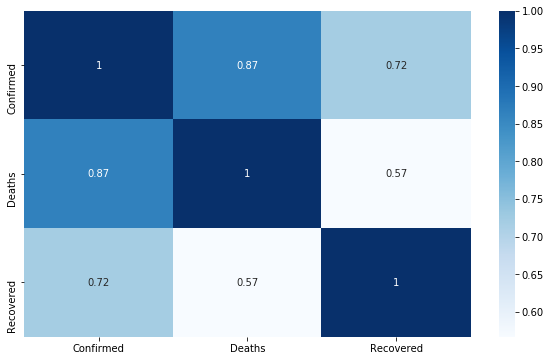

In [60]:
x=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(x,cmap='Blues',annot=True)

---

In [135]:
df_2 = pd.read_excel('Covid cases in India.xlsx')
df_2

S. No. Name of State / UT  Total Confirmed cases (Indian National)  \
0        1     Andhra Pradesh                                       12   
1        2       Chhattisgarh                                        6   
2        3              Delhi                                       38   
3        4            Gujarat                                       43   
4        5            Haryana                                       16   
5        6   Himachal Pradesh                                        4   
6        7          Karnataka                                       20   
7        8             Kerala                                      131   
8        9     Madhya Pradesh                                       23   
9       10        Maharashtra                                      144   
10      11             Odisha                                        3   
11      12         Puducherry                                        1   
12      13             Punjab                                       29   
13      14          Rajasthan                                       41   
14      15         Tamil Nadu                                       32   
15      16          Telengana                                       34   
16      17         Chandigarh                                        7   
17      18  Jammu and Kashmir                                       18   
18      19             Ladakh                                       13   
19      20      Uttar Pradesh                                       42   
20      21        Uttarakhand                                        4   
21      22        West Bengal                                       11   
22      23              Bihar                                        7   
23      24            Mizoram                                        1   
24      25                Goa                                        6   
25      26            Manipur                                        1   

    Total Confirmed cases ( Foreign National )  Cured  Death  
0                                            0      1      0  
1                                            0      0      0  
2                                            1      6      1  
3                                            0      0      3  
4                                           14     11      0  
5                                            0      0      1  
6                                            0      3      2  
7                                            7     11      0  
8                                            0      0      1  
9                                            3     15      4  
10                                           0      0      0  
11                                           0      0      0  
12                                           0      0      1  
13                                           2      3      0  
14                                           3      1      1  
15                                          11      1      0  
16                                           0      0      0  
17                                           0      1      1  
18                                           0      0      0  
19                                           1     11      0  
20                                           0      0      0  
21                                           0      0      1  
22                                           0      0      1  
23                                           0      0      0  
24                                           0      0      0  
25                                           0      0      0

In [136]:
df_2.drop('S. No.',axis=1,inplace=True)

In [137]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Name of State / UT                          26 non-null     object
 1   Total Confirmed cases (Indian National)     26 non-null     int64 
 2   Total Confirmed cases ( Foreign National )  26 non-null     int64 
 3   Cured                                       26 non-null     int64 
 4   Death                                       26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [138]:
df_2.isnull().sum()

Name of State / UT                            0
Total Confirmed cases (Indian National)       0
Total Confirmed cases ( Foreign National )    0
Cured                                         0
Death                                         0
dtype: int64

In [139]:
df_2['total_cases'] = df_2['Total Confirmed cases (Indian National)']+df_2['Total Confirmed cases ( Foreign National )']

In [140]:
df_2.style.background_gradient(cmap='Reds')

In [141]:
cases_in_each_state = df_2.groupby('Name of State / UT')['total_cases'].sum().sort_values(ascending=False).reset_index()


In [142]:
cases_in_each_state.style.background_gradient(cmap='PuBu')

In [143]:

df_2.iplot(kind='bar',x='Name of State / UT',y='total_cases',title='States of India vs Total cases',xTitle='Name of State / UT'
           ,yTitle='total_cases',colors='darkred')

In [144]:
df_2.iplot(kind='scatter',x='Name of State / UT',y='total_cases',title='States of India vs Total cases',xTitle='Name of State / UT'
           ,yTitle='total_cases',colors='darkred',mode='markers+lines')

In [145]:
t= df_2.corr()

In [146]:
t

Total Confirmed cases (Indian National)  \
Total Confirmed cases (Indian National)                                    1.000000   
Total Confirmed cases ( Foreign National )                                 0.342938   
Cured                                                                      0.776832   
Death                                                                      0.505713   
total_cases                                                                0.995832   

                                            Total Confirmed cases ( Foreign National )  \
Total Confirmed cases (Indian National)                                       0.342938   
Total Confirmed cases ( Foreign National )                                    1.000000   
Cured                                                                         0.528416   
Death                                                                        -0.125513   
total_cases                                                                   0.427184   

                                               Cured     Death  total_cases  
Total Confirmed cases (Indian National)     0.776832  0.505713     0.995832  
Total Confirmed cases ( Foreign National )  0.528416 -0.125513     0.427184  
Cured                                       1.000000  0.285954     0.799034  
Death                                       0.285954  1.000000     0.474580  
total_cases                                 0.799034  0.474580     1.000000

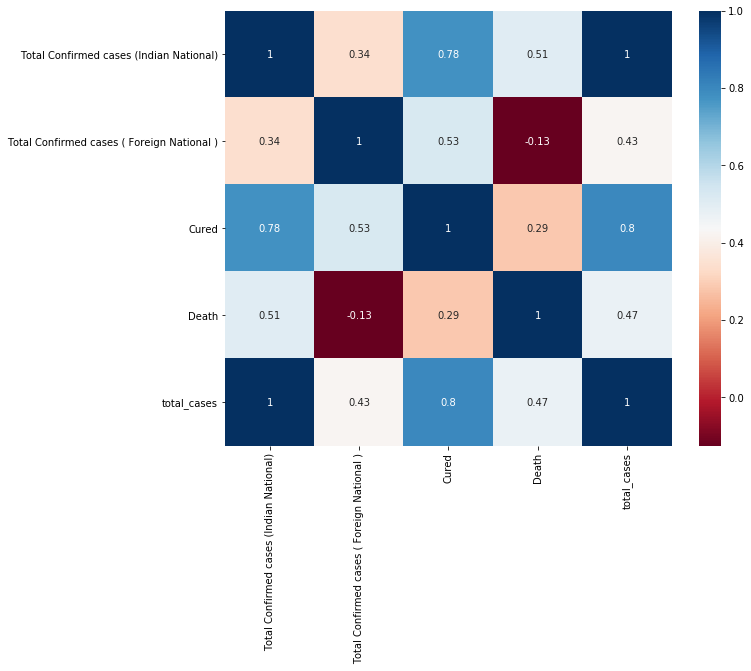

In [156]:
plt.figure(figsize=(10,8))
sns.heatmap(t,annot=True,cmap='RdBu')

---

In [158]:
indian_coordinates = pd.read_excel('Indian Coordinates.xlsx')
indian_coordinates.head(10)

Name of State / UT   Latitude  Longitude
0     Andaman And Nicobar   11.667026  92.735983
1           Andhra Pradesh  14.750429  78.570026
2       Arunachal Pradesh   27.100399  93.616601
3                   Assam   26.749981  94.216667
4                   Bihar   25.785414  87.479973
5              Chandigarh   30.719997  76.780006
6            Chhattisgarh   22.090420  82.159987
7  Dadra And Nagar Haveli   20.266578  73.016618
8                    Delhi  28.669993  77.230004
9                     Goa   15.491997  73.818001

In [164]:
df_with_coordinates = pd.merge(indian_coordinates,df_2,on='Name of State / UT',)

In [165]:
df_with_coordinates

Name of State / UT   Latitude  Longitude  \
0      Andhra Pradesh  14.750429  78.570026   
1               Delhi  28.669993  77.230004   
2             Haryana  28.450006  77.019991   
3           Karnataka  12.570381  76.919997   
4              Kerala   8.900373  76.569993   
5         Maharashtra  19.250232  73.160175   
6              Punjab  31.519974  75.980003   
7           Rajasthan  26.449999  74.639981   
8           Telengana  18.112400  79.019300   
9          Tamil Nadu  12.920386  79.150042   
10      Uttar Pradesh  27.599981  78.050006   
11        Uttarakhand  30.320409  78.050006   

    Total Confirmed cases (Indian National)  \
0                                        12   
1                                        38   
2                                        16   
3                                        20   
4                                       131   
5                                       144   
6                                        29   
7                                        41   
8                                        34   
9                                        32   
10                                       42   
11                                        4   

    Total Confirmed cases ( Foreign National )  Cured  Death  total_cases  
0                                            0      1      0           12  
1                                            1      6      1           39  
2                                           14     11      0           30  
3                                            0      3      2           20  
4                                            7     11      0          138  
5                                            3     15      4          147  
6                                            0      0      1           29  
7                                            2      3      0           43  
8                                           11      1      0           45  
9                                            3      1      1           35  
10                                           1     11      0           43  
11                                           0      0      0            4

In [166]:
#for geo location
import folium

In [168]:
locations_of_india = df_with_coordinates[['Latitude','Longitude']]

In [174]:
locationlist_of_india = locations_of_india.values.tolist()

In [175]:
locationlist_of_india

[[14.7504291, 78.57002559],
 [28.6699929, 77.23000403],
 [28.45000633, 77.01999101],
 [12.57038129, 76.91999711],
 [8.900372741, 76.56999263],
 [19.25023195, 73.16017493],
 [31.51997398, 75.98000281],
 [26.44999921, 74.63998124],
 [18.1124, 79.0193],
 [12.92038576, 79.15004187],
 [27.59998069, 78.05000565],
 [30.32040895, 78.05000565]]

In [176]:
len(locationlist_of_india)

12

In [224]:
map = folium.Map(location=[21,76],zoom_start=5)
for points in range(0, len(locationlist_of_india)):
    folium.Marker(locationlist_of_india[points],popup=df_with_coordinates['Name of State / UT'][points]).add_to(map)

In [225]:
map

In [281]:
df_timeseries = pd.read_csv('time_series_covid_19_confirmed.csv')
df_timeseries

Province/State  Country/Region        Lat       Long  \
0                                  NaN     Afghanistan  33.000000  65.000000   
1                                  NaN         Albania  41.153300  20.168300   
2                                  NaN         Algeria  28.033900   1.659600   
3                                  NaN         Andorra  42.506300   1.521800   
4                                  NaN          Angola -11.202700  17.873900   
..                                 ...             ...        ...        ...   
257                                NaN          Malawi -13.254308  34.301525   
258  Falkland Islands (Islas Malvinas)  United Kingdom -51.796300 -59.523600   
259          Saint Pierre and Miquelon          France  46.885200 -56.315900   
260                                NaN     South Sudan   6.877000  31.307000   
261                                NaN  Western Sahara  24.215500 -12.885800   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/27/20  \
0          0        0        0        0        0        0  ...      110   
1          0        0        0        0        0        0  ...      186   
2          0        0        0        0        0        0  ...      409   
3          0        0        0        0        0        0  ...      267   
4          0        0        0        0        0        0  ...        4   
..       ...      ...      ...      ...      ...      ...  ...      ...   
257        0        0        0        0        0        0  ...        0   
258        0        0        0        0        0        0  ...        0   
259        0        0        0        0        0        0  ...        0   
260        0        0        0        0        0        0  ...        0   
261        0        0        0        0        0        0  ...        0   

     3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  \
0        110      120      170      174     237     273     281     299   
1        197      212      223      243     259     277     304     333   
2        454      511      584      716     847     986    1171    1251   
3        308      334      370      376     390     428     439     466   
4          5        7        7        7       8       8       8      10   
..       ...      ...      ...      ...     ...     ...     ...     ...   
257        0        0        0        0       0       3       3       4   
258        0        0        0        0       0       0       0       1   
259        0        0        0        0       0       0       0       0   
260        0        0        0        0       0       0       0       0   
261        0        0        0        0       0       0       0       0   

     4/5/20  
0       349  
1       361  
2      1320  
3       501  
4        14  
..      ...  
257       4  
258       2  
259       1  
260       1  
261       4  

[262 rows x 79 columns]

In [282]:
df_timeseries.rename(columns={'Country/Region':'Country'},inplace=True)

In [283]:
df_latlong_world = pd.merge(df,df_timeseries,on=['Country'])
df_latlong_world

ObservationDate       State         Country          Last Update  \
0          01/22/2020  Washington              US      1/22/2020 17:00   
1          01/23/2020  Washington              US        1/23/20 17:00   
2          01/24/2020  Washington              US        1/24/20 17:00   
3          01/24/2020     Chicago              US        1/24/20 17:00   
4          01/25/2020  Washington              US        1/25/20 17:00   
...               ...         ...             ...                  ...   
21830      04/03/2020         NaN          Malawi  2020-04-03 22:52:45   
21831      04/04/2020         NaN          Malawi  2020-04-04 23:41:02   
21832      04/05/2020         NaN          Malawi  2020-04-05 23:13:44   
21833      04/05/2020         NaN     South Sudan  2020-04-05 23:13:44   
21834      04/05/2020         NaN  Western Sahara  2020-04-05 23:13:44   

       Confirmed  Deaths  Recovered Province/State        Lat       Long  ...  \
0            1.0     0.0        0.0            NaN  37.090200 -95.712900  ...   
1            1.0     0.0        0.0            NaN  37.090200 -95.712900  ...   
2            1.0     0.0        0.0            NaN  37.090200 -95.712900  ...   
3            1.0     0.0        0.0            NaN  37.090200 -95.712900  ...   
4            1.0     0.0        0.0            NaN  37.090200 -95.712900  ...   
...          ...     ...        ...            ...        ...        ...  ...   
21830        3.0     0.0        0.0            NaN -13.254308  34.301525  ...   
21831        4.0     0.0        0.0            NaN -13.254308  34.301525  ...   
21832        4.0     0.0        0.0            NaN -13.254308  34.301525  ...   
21833        1.0     0.0        0.0            NaN   6.877000  31.307000  ...   
21834        4.0     0.0        0.0            NaN  24.215500 -12.885800  ...   

       3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  \
0       101657   121478   140886   161807   188172  213372  243453  275586   
1       101657   121478   140886   161807   188172  213372  243453  275586   
2       101657   121478   140886   161807   188172  213372  243453  275586   
3       101657   121478   140886   161807   188172  213372  243453  275586   
4       101657   121478   140886   161807   188172  213372  243453  275586   
...        ...      ...      ...      ...      ...     ...     ...     ...   
21830        0        0        0        0        0       0       3       3   
21831        0        0        0        0        0       0       3       3   
21832        0        0        0        0        0       0       3       3   
21833        0        0        0        0        0       0       0       0   
21834        0        0        0        0        0       0       0       0   

       4/4/20  4/5/20  
0      308850  337072  
1      308850  337072  
2      308850  337072  
3      308850  337072  
4      308850  337072  
...       ...     ...  
21830       4       4  
21831       4       4  
21832       4       4  
21833       0       1  
21834       0       4  

[21835 rows x 85 columns]

In [284]:
df_latlong_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21835 entries, 0 to 21834
Data columns (total 85 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  21835 non-null  object 
 1   State            15563 non-null  object 
 2   Country          21835 non-null  object 
 3   Last Update      21835 non-null  object 
 4   Confirmed        21835 non-null  float64
 5   Deaths           21835 non-null  float64
 6   Recovered        21835 non-null  float64
 7   Province/State   13604 non-null  object 
 8   Lat              21835 non-null  float64
 9   Long             21835 non-null  float64
 10  1/22/20          21835 non-null  int64  
 11  1/23/20          21835 non-null  int64  
 12  1/24/20          21835 non-null  int64  
 13  1/25/20          21835 non-null  int64  
 14  1/26/20          21835 non-null  int64  
 15  1/27/20          21835 non-null  int64  
 16  1/28/20          21835 non-null  int64  
 17  1/29/20     

In [308]:
fig=px.density_mapbox(df_latlong_world,lat='Lat',lon='Long',hover_name='Province/State',hover_data=['Confirmed','Deaths','Recovered'],animation_frame='ObservationDate',color_continuous_scale='portland',zoom=0.5,radius=8,height=600)
fig.update_layout(title='World wide corana virus')
fig.update_layout(mapbox_style='open-street-map',mapbox_center_lon=0)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})